In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

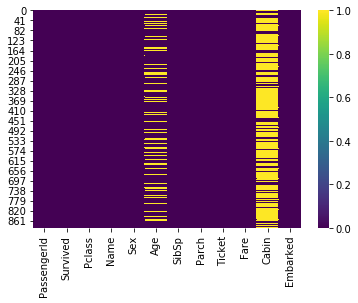

In [3]:
sns.heatmap(train.isnull(),cmap='viridis')

In [4]:
import cufflinks as cf
cf.go_offline()

In [8]:
train['Fare'].iplot(kind='hist',bins=100,color='green')

In [9]:
train[train['Fare']==train['Fare'].max()]

PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
737    male  35.0      0      0  PC 17755  512.3292         B101        C

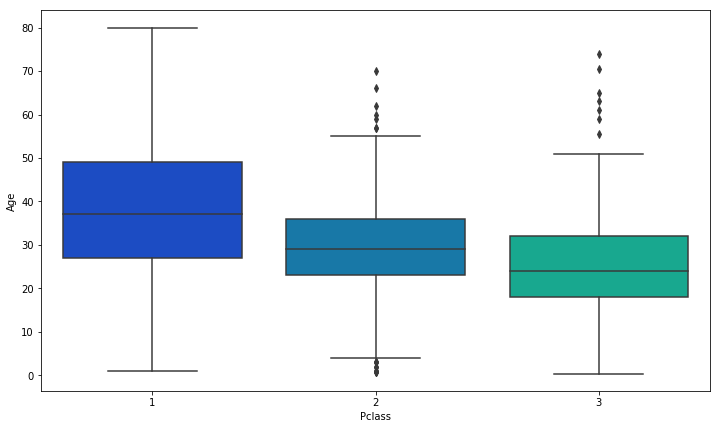

In [10]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [11]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [12]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

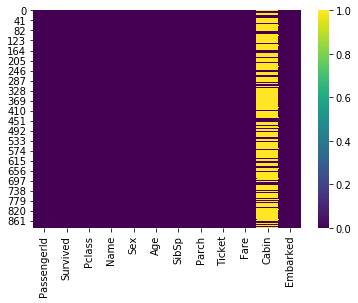

In [13]:
sns.heatmap(train.isnull(),cmap='viridis')

In [14]:
train.drop('Cabin',axis=1,inplace=True)

In [15]:
train.dropna(inplace=True)

In [16]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    0.382452    2.311586   29.019314    0.524184   
std     256.998173    0.486260    0.834700   13.209814    1.103705   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     224.000000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   26.000000    0.000000   
75%     668.000000    1.000000    3.000000   36.500000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  889.000000  889.000000  
mean     0.382452   32.096681  
std      0.806761   49.697504  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [17]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [18]:
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [19]:
Names = train['Name']

In [20]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
le.fit(train['Sex'])

LabelEncoder()

In [23]:
train['Sex'] = le.transform(train['Sex'])

In [24]:
train['Name'] = train['Name'].apply(lambda x:x.split(',')[-1].split()[0])

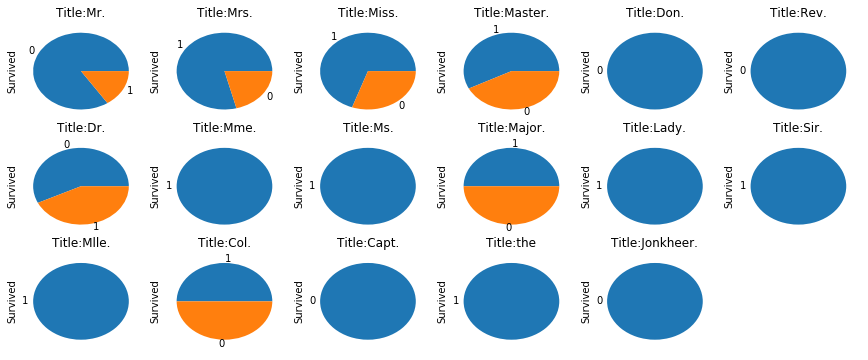

In [25]:
fig = plt.figure(figsize=(15,6))
i=1
for title in train['Name'].unique():
    fig.add_subplot(3, 6, i)
    plt.title("Title:{}".format(title))
    train.Survived[train['Name']==title].value_counts().plot(kind='pie')
    i+=1

In [26]:
train['Name'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.'], dtype=object)

In [27]:
train.head()

PassengerId  Survived  Pclass   Name  Sex   Age  SibSp  Parch  \
0            1         0       3    Mr.    1  22.0      1      0   
1            2         1       1   Mrs.    0  38.0      1      0   
2            3         1       3  Miss.    0  26.0      0      0   
3            4         1       1   Mrs.    0  35.0      1      0   
4            5         0       3    Mr.    1  35.0      0      0   

             Ticket     Fare Embarked  
0         A/5 21171   7.2500        S  
1          PC 17599  71.2833        C  
2  STON/O2. 3101282   7.9250        S  
3            113803  53.1000        S  
4            373450   8.0500        S

In [28]:
 replacement = {
    'Don.': 0,
    'Rev.': 0,
    'Jonkheer.': 0,
    'Capt.': 0,
    'Mr.': 1,
    'Dr.': 2,
    'Col.': 3,
    'Major.': 3,
    'Master.': 4,
    'Miss.': 5,
    'Mrs.': 6,
    'Mme.': 7,
    'Ms.': 7,
    'Mlle.': 7,
    'Sir.': 7,
    'Lady.': 7,
    'the': 7
}
train['Name'] = train['Name'].apply(lambda x:replacement[x])

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
train['Name'] = StandardScaler().fit_transform(train['Name'].values.reshape(-1, 1))

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [31]:
train.drop('PassengerId',inplace=True,axis=1)

In [32]:
train.head()

Survived  Pclass      Name  Sex   Age  SibSp  Parch            Ticket  \
0         0       3 -0.795039    1  22.0      1      0         A/5 21171   
1         1       1  1.542229    0  38.0      1      0          PC 17599   
2         1       3  1.074775    0  26.0      0      0  STON/O2. 3101282   
3         1       1  1.542229    0  35.0      1      0            113803   
4         0       3 -0.795039    1  35.0      0      0            373450   

      Fare Embarked  
0   7.2500        S  
1  71.2833        C  
2   7.9250        S  
3  53.1000        S  
4   8.0500        S

In [33]:
train['Age'] = StandardScaler().fit_transform(train['Age'].values.reshape(-1, 1))

In [34]:
train[train['Fare'].isna()]

Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []

In [35]:
test = pd.read_csv('test.csv')
test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

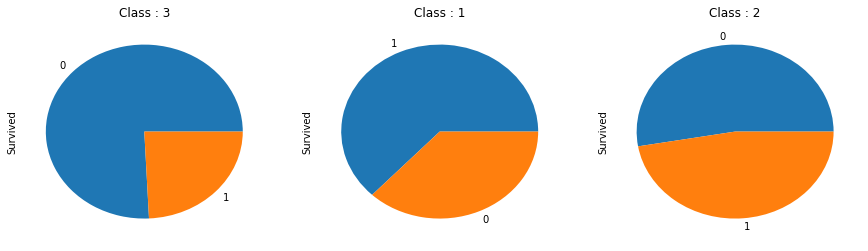

In [31]:
fig = plt.figure(figsize=(15,4))

i=1
for pclass in train['Pclass'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Class : {}'.format(pclass))
    train.Survived[train['Pclass'] == pclass].value_counts().plot(kind='pie')
    i += 1

In [32]:
train['Pclass'] = StandardScaler().fit_transform(train['Pclass'].values.reshape(-1, 1))

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



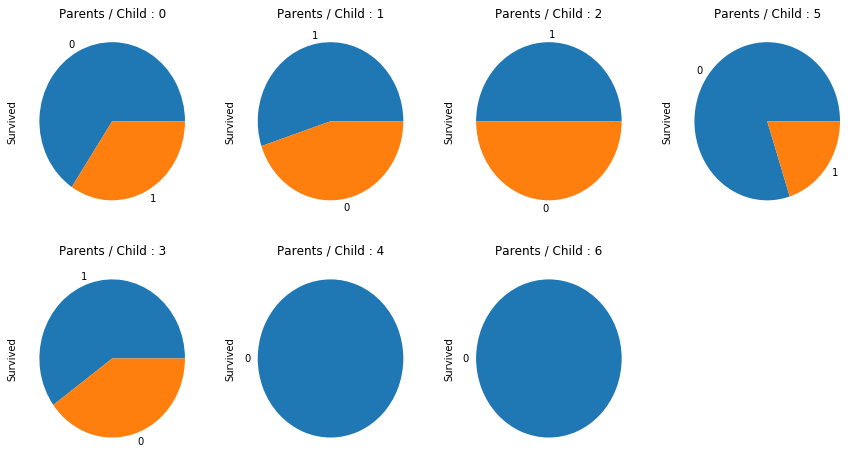

In [33]:
fig = plt.figure(figsize=(15,8))
i = 0
for parch in train['Parch'].unique():
    fig.add_subplot(2, 4, i+1)
    plt.title('Parents / Child : {}'.format(parch))
    train.Survived[train['Parch'] == parch].value_counts().plot(kind='pie')
    i += 1

In [34]:
replacement = {
    6: 0,
    4: 0,
    5: 1,
    0: 2,
    2: 3,
    1: 4,
    3: 5
}
train['Parch'] = train['Parch'].apply(lambda x: replacement.get(x))
train['Parch'] = StandardScaler().fit_transform(train['Parch'].values.reshape(-1, 1))

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [42]:
train.drop('Ticket', axis=1, inplace=True)

In [36]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

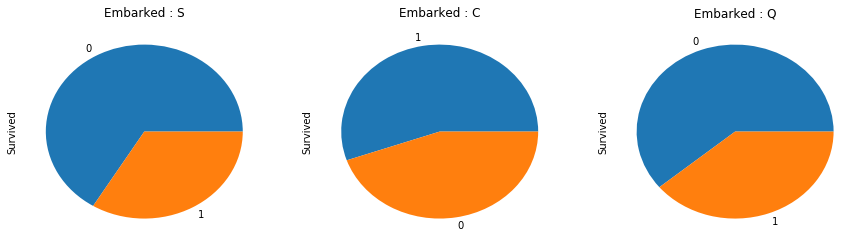

In [37]:
train['Embarked'].fillna('S', inplace=True)
fig = plt.figure(figsize=(15,4))
i = 1
for embarked in train['Embarked'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Embarked : {}'.format(embarked))
    train.Survived[train['Embarked'] == embarked].value_counts().plot(kind='pie')
    i += 1 

In [38]:
replacement = {
    'S': 0,
    'Q': 1,
    'C': 2
}

train['Embarked'] = train['Embarked'].apply(lambda x: replacement.get(x))
train['Embarked'] = StandardScaler().fit_transform(train['Embarked'].values.reshape(-1, 1))
train.head()['Embarked']

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



0   -0.586840
1    1.939555
2   -0.586840
3   -0.586840
4   -0.586840
Name: Embarked, dtype: float64

In [39]:
train.head()

Survived  Pclass      Name  Sex       Age  SibSp  Parch            Ticket  \
0         0       3 -0.795039    1 -0.531670      1      0         A/5 21171   
1         1       1  1.542229    0  0.680232      1      0          PC 17599   
2         1       3  1.074775    0 -0.228695      0      0  STON/O2. 3101282   
3         1       1  1.542229    0  0.453001      1      0            113803   
4         0       3 -0.795039    1  0.453001      0      0            373450   

      Fare  Embarked  
0   7.2500 -0.586840  
1  71.2833  1.939555  
2   7.9250 -0.586840  
3  53.1000 -0.586840  
4   8.0500 -0.586840

In [40]:
train['Cabin'].fillna('U', inplace=True)
train['Cabin'] = train['Cabin'].apply(lambda x: x[0])
train['Cabin'].unique()

KeyError: 'Cabin'

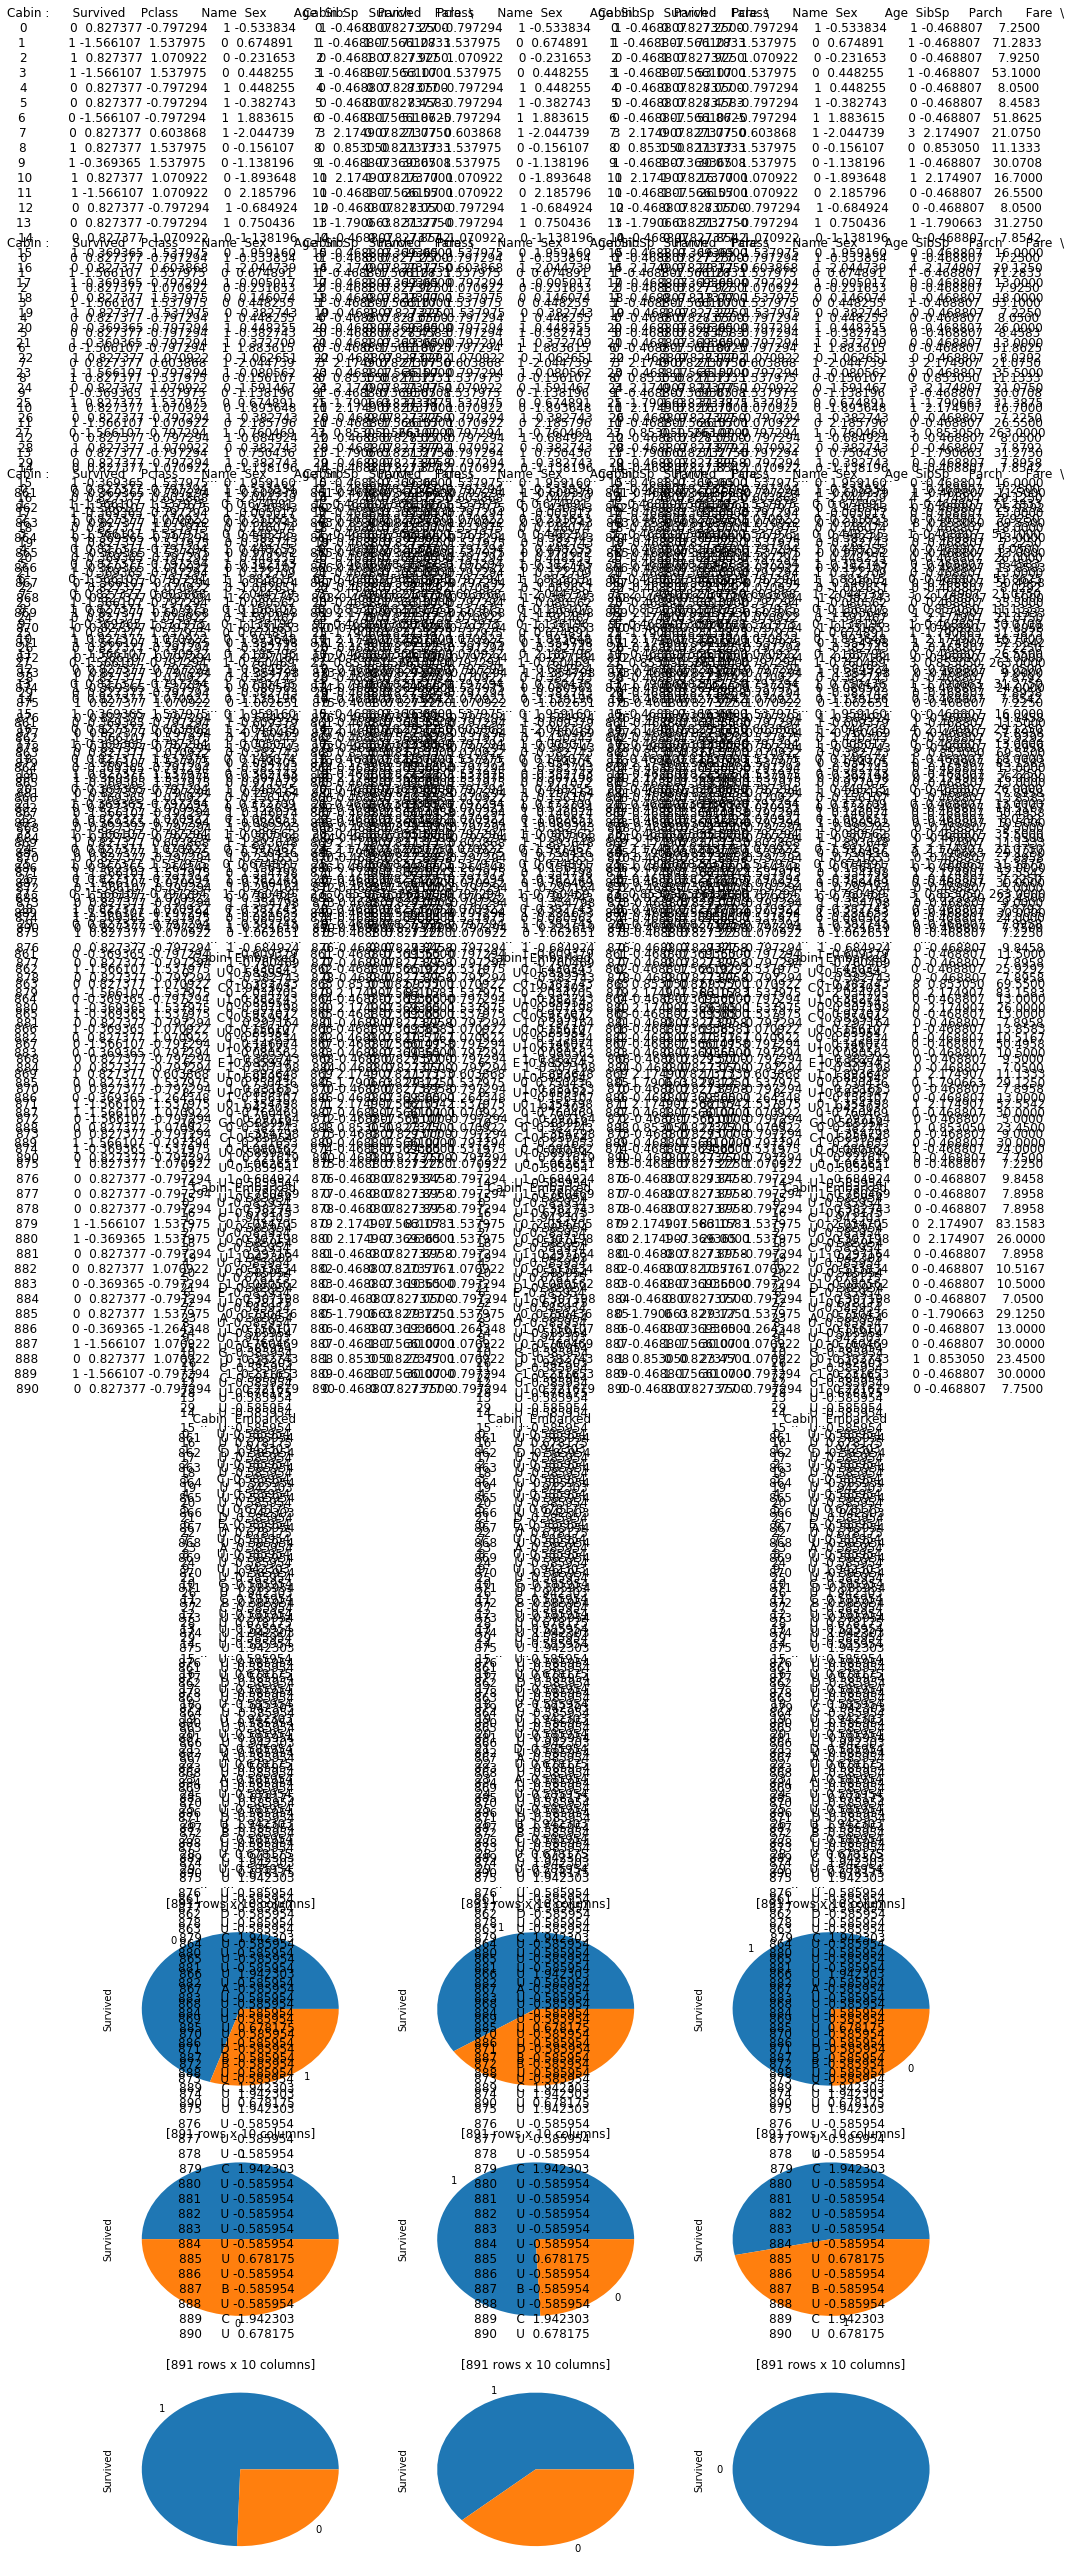

In [41]:
fig = plt.figure(figsize=(15,12))
i = 1
for cabin in train['Cabin'].unique():
    fig.add_subplot(3, 3, i)
    plt.title('Cabin : {}'.format(train))
    train.Survived[train['Cabin'] == cabin].value_counts().plot(kind='pie')
    i += 1

In [42]:
replacement = {
    'T': 0,
    'U': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'E': 7,
    'D': 8
}

train['Cabin'] = train['Cabin'].apply(lambda x: replacement.get(x))
train['Cabin'] = StandardScaler().fit_transform(train['Cabin'].values.reshape(-1, 1))
train.head()['Cabin']

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



0   -0.494813
1    0.960231
2   -0.494813
3    0.960231
4   -0.494813
Name: Cabin, dtype: float64

In [43]:
train.head()

Survived  Pclass      Name  Sex       Age  SibSp  Parch     Fare  Embarked
0         0       3 -0.795039    1 -0.531670      1      0   7.2500 -0.586840
1         1       1  1.542229    0  0.680232      1      0  71.2833  1.939555
2         1       3  1.074775    0 -0.228695      0      0   7.9250 -0.586840
3         1       1  1.542229    0  0.453001      1      0  53.1000 -0.586840
4         0       3 -0.795039    1  0.453001      0      0   8.0500 -0.586840

In [44]:
from sklearn.model_selection import train_test_split
survived = train['Survived']
train.drop('Survived', axis=1, inplace=True)
Xtrain, Xtest, ytrain, ytest = train_test_split(train, survived, test_size=0.2, random_state=42)

In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

models = [
    RandomForestClassifier(n_estimators=100),
    MLPClassifier(),
    KNeighborsClassifier(n_neighbors=9)
]

for model in models:
    model.fit(Xtrain, ytrain)
    score = model.score(Xtest, ytest)
    print(score)

0.7808988764044944
0.8258426966292135
0.797752808988764


C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [80]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout

In [81]:
classifier = Sequential()

In [82]:
classifier.add(Dense(activation='relu',units=32,input_dim=8))
classifier.add(Dropout(rate=0.2))

In [85]:
classifier.add(Dense(activation='relu',units=64))
classifier.add(Dropout(rate=0.2))

In [86]:
classifier.add(Dense(activation='relu',units=32))
classifier.add(Dropout(rate=0.2))

In [87]:
classifier.add(Dense(activation='relu',units=16))
classifier.add(Dropout(rate=0.2))

In [88]:
classifier.add(Dense(activation='sigmoid',units=1))

In [89]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [90]:
classifier.fit(Xtrain,ytrain,batch_size=8,epochs=250)

Epoch 1/250
711/711 [==============================] - 1s 1ms/step - loss: 0.8567 - acc: 0.5260
Epoch 2/250
711/711 [==============================] - 0s 252us/step - loss: 0.7539 - acc: 0.5963
Epoch 3/250
711/711 [==============================] - 0s 243us/step - loss: 0.6929 - acc: 0.6357
Epoch 4/250
711/711 [==============================] - 0s 247us/step - loss: 0.6967 - acc: 0.6315
Epoch 5/250
711/711 [==============================] - 0s 234us/step - loss: 0.6825 - acc: 0.6301
Epoch 6/250
711/711 [==============================] - 0s 238us/step - loss: 0.6547 - acc: 0.6498
Epoch 7/250
711/711 [==============================] - 0s 254us/step - loss: 0.6514 - acc: 0.6442
Epoch 8/250
711/711 [==============================] - 0s 233us/step - loss: 0.6505 - acc: 0.6385
Epoch 9/250
711/711 [==============================] - 0s 245us/step - loss: 0.6305 - acc: 0.6456
Epoch 10/250
711/711 [==============================] - 0s 267us/step - loss: 0.6166 - acc: 0.6639
Epoch 11/250
711/711 

711/711 [==============================] - 0s 456us/step - loss: 0.4234 - acc: 0.8172
Epoch 84/250
711/711 [==============================] - 0s 275us/step - loss: 0.4124 - acc: 0.8284
Epoch 85/250
711/711 [==============================] - 0s 286us/step - loss: 0.4100 - acc: 0.8354
Epoch 86/250
711/711 [==============================] - 0s 317us/step - loss: 0.3912 - acc: 0.8326
Epoch 87/250
711/711 [==============================] - 0s 286us/step - loss: 0.3807 - acc: 0.8425
Epoch 88/250
711/711 [==============================] - 0s 384us/step - loss: 0.3974 - acc: 0.8354
Epoch 89/250
711/711 [==============================] - 0s 405us/step - loss: 0.3913 - acc: 0.8340
Epoch 90/250
711/711 [==============================] - 0s 346us/step - loss: 0.3812 - acc: 0.8383
Epoch 91/250
711/711 [==============================] - 0s 375us/step - loss: 0.3884 - acc: 0.8425
Epoch 92/250
711/711 [==============================] - 0s 346us/step - loss: 0.3812 - acc: 0.8453
Epoch 93/250
711/711 [=

711/711 [==============================] - 0s 391us/step - loss: 0.3878 - acc: 0.8411 0s - loss: 0.3840 - acc: 0.84
Epoch 165/250
711/711 [==============================] - 0s 242us/step - loss: 0.3593 - acc: 0.8523
Epoch 166/250
711/711 [==============================] - 0s 176us/step - loss: 0.3799 - acc: 0.8467
Epoch 167/250
711/711 [==============================] - 0s 198us/step - loss: 0.3709 - acc: 0.8537
Epoch 168/250
711/711 [==============================] - 0s 198us/step - loss: 0.3867 - acc: 0.8270
Epoch 169/250
711/711 [==============================] - 0s 220us/step - loss: 0.3810 - acc: 0.8439
Epoch 170/250
711/711 [==============================] - 0s 176us/step - loss: 0.3661 - acc: 0.8551
Epoch 171/250
711/711 [==============================] - 0s 377us/step - loss: 0.3578 - acc: 0.8509
Epoch 172/250
711/711 [==============================] - 0s 322us/step - loss: 0.3719 - acc: 0.8439
Epoch 173/250
711/711 [==============================] - 0s 197us/step - loss: 0.373

711/711 [==============================] - 0s 268us/step - loss: 0.3582 - acc: 0.8509
Epoch 246/250
711/711 [==============================] - 0s 300us/step - loss: 0.3499 - acc: 0.8650
Epoch 247/250
711/711 [==============================] - 0s 286us/step - loss: 0.3622 - acc: 0.8439
Epoch 248/250
711/711 [==============================] - 0s 300us/step - loss: 0.3687 - acc: 0.8481
Epoch 249/250
711/711 [==============================] - 0s 302us/step - loss: 0.3537 - acc: 0.8636
Epoch 250/250
711/711 [==============================] - 0s 307us/step - loss: 0.3559 - acc: 0.8453


In [76]:
pred = classifier.predict_classes(Xtest)

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
confusion_matrix(ytest,pred)

array([[92, 17],
       [18, 51]], dtype=int64)

In [93]:
(confusion_matrix(ytest,pred)[0][0]+confusion_matrix(ytest,pred)[1][1])/(confusion_matrix(ytest,pred)[0][0]+confusion_matrix(ytest,pred)[1][1]+confusion_matrix(ytest,pred)[0][1]+confusion_matrix(ytest,pred)[1][0])

0.8033707865168539